# Lista de Exercícios 2: Amostragem de sinais

- Slide Aula 2: https://marofe.github.io/controle-digital/2024/aula2.html

In [10]:
import matplotlib.pyplot as plt
import numpy as np

### **Objetivo:**  
O objetivo desta prática é simular a discretização de um sinal contínuo com diferentes períodos de amostragem. Para isso, considere o sinal:

\[ y(t) = 1 + \cos(\omega_n t) + \sin(2\omega_n t), \text{ onde } \omega_n = 10\pi \]

**Passos:**

1. **Plotagem do sinal:**  
   Mostre o sinal \( y(t) \) para o intervalo \( t = [0, 2] \) usando um gráfico.

2. **Espectro de frequência:**  
   Obtenha o espectro de frequência de \( y(t) \) utilizando a Transformada de Fourier (FFT). Qual é a frequência máxima do sinal?  
   *(Dica: Consulte a documentação da função `fft` para mais detalhes.)*

3. **Amostragem na frequência de Nyquist:**  
   Faça a amostragem do sinal na frequência de Nyquist (\( \hat{f_s} = 2f_M \)) e mostre o resultado utilizando a função `stem`. Compare com o sinal contínuo.  
   Usando apenas as amostras do sinal, é possível reconstruir de forma única o sinal contínuo? Justifique.

4. **Amostragem abaixo da frequência de Nyquist:**  
   Faça a amostragem do sinal em uma frequência abaixo da de Nyquist (\( \hat{f_s} < 2f_M \)) e mostre o resultado utilizando `stem`. Compare com o sinal contínuo.  
   Obtenha também o sinal com aliasing (\( \omega_b = \omega_n - \omega_s \)) e compare.

5. **Amostragem acima da frequência de Nyquist:**  
   Faça a amostragem do sinal em uma frequência acima da de Nyquist (\( \hat{f_s} > 2f_M \)) e mostre o resultado utilizando `stem`.

   *(Dica: Consulte a documentação da função `fft` para mais detalhes.)*

**Exemplo de código em MATLAB:**

```matlab
n = numel(y); % Obtém o tamanho do vetor sinal
Y = fft(y); % Calcula a FFT (Transformada de Fourier bilateral)
Y = abs(fftshift(Y) / n); % Obtém a magnitude da FFT
f = fa / n * (-floor(n/2):floor(n/2)); % Vetor de frequências
figure; % Cria uma nova figura
plot(f, Y); % Plota o espectro de y
```


In [11]:
# Definindo os parâmetros
omega_n = 10 * np.pi
t = np.linspace(0, 2, 1000)  # Vetor de tempo de 0 a 2 segundos

# Definindo o sinal y(t)
y_t = 1 + np.cos(omega_n * t) + np.sin(2 * omega_n * t)

# Calculando a FFT
n = len(y_t)
Y = np.fft.fft(y_t)  # FFT de y(t)
Y = np.fft.fftshift(Y)  # Shift da FFT para centralizar no zero
Y_magnitude = np.abs(Y) / n  # Magnitude da FFT normalizada

# Definindo o vetor de frequências
fa = 1 / (t[1] - t[0])  # Frequência de amostragem
f = fa * np.fft.fftfreq(n, d=(t[1] - t[0]))
f = np.fft.fftshift(f)  # Shift das frequências

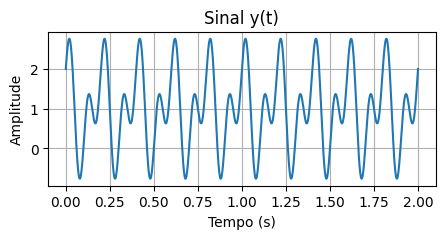

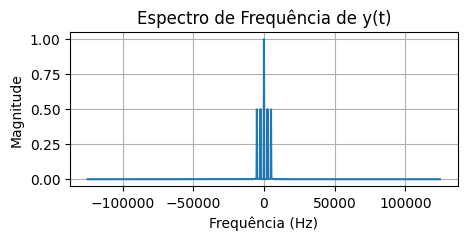

In [12]:
# Plotando o sinal y(t)
plt.figure(figsize=(5, 2))
plt.plot(t, y_t)
plt.title('Sinal y(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotando o espectro de frequência
plt.figure(figsize=(5, 2))
plt.plot(f, Y_magnitude)
plt.title('Espectro de Frequência de y(t)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [16]:
# Parâmetros do sinal
omega_n = 10 * np.pi
t_continuous = np.linspace(0, 2, 1000)  # Sinal contínuo de 0 a 2 segundos
y_continuous = 1 + np.cos(omega_n * t_continuous) + np.sin(2 * omega_n * t_continuous)

# Frequência de Nyquist
fM = omega_n / (2 * np.pi)  # Frequência máxima do sinal
fs_nyquist = 2 * fM  # Frequência de Nyquist

# Amostragem na frequência de Nyquist
t_nyquist = np.arange(0, 2, 1/fs_nyquist)
y_nyquist = 1 + np.cos(omega_n * t_nyquist) + np.sin(2 * omega_n * t_nyquist)

# Amostragem abaixo da frequência de Nyquist (fs < 2fM)
fs_below_nyquist = fM  # Frequência abaixo da de Nyquist
t_below_nyquist = np.arange(0, 2, 1/fs_below_nyquist)
y_below_nyquist = 1 + np.cos(omega_n * t_below_nyquist) + np.sin(2 * omega_n * t_below_nyquist)

# Amostragem acima da frequência de Nyquist (fs > 2fM)
fs_above_nyquist = 10 * fM  # Frequência acima da de Nyquist
t_above_nyquist = np.arange(0, 2, 1/fs_above_nyquist)
y_above_nyquist = 1 + np.cos(omega_n * t_above_nyquist) + np.sin(2 * omega_n * t_above_nyquist)

# Calculando o aliasing (ωb = ωn - ωs) para a amostragem abaixo da de Nyquist
omega_s_below_nyquist = 2 * np.pi * fs_below_nyquist
omega_b = omega_n - omega_s_below_nyquist
y_aliasing = 1 + np.cos(omega_b * t_below_nyquist) + np.sin(2 * omega_b * t_below_nyquist)


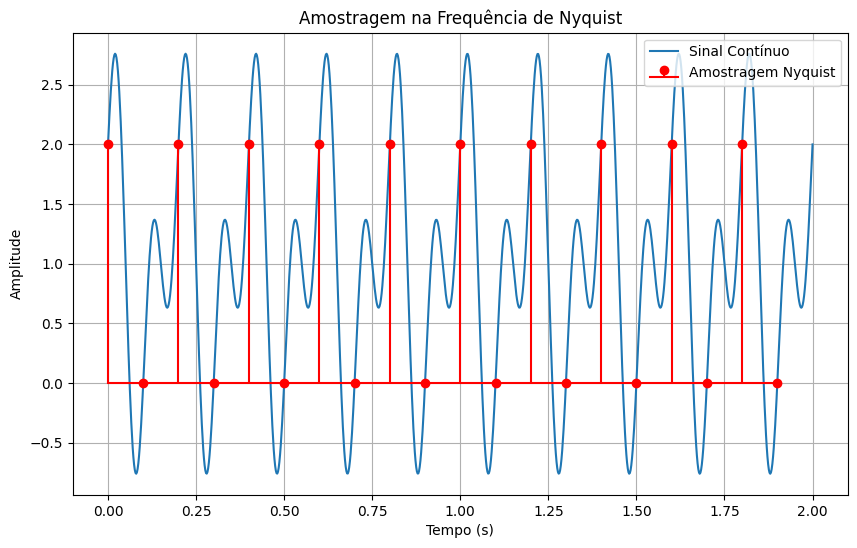

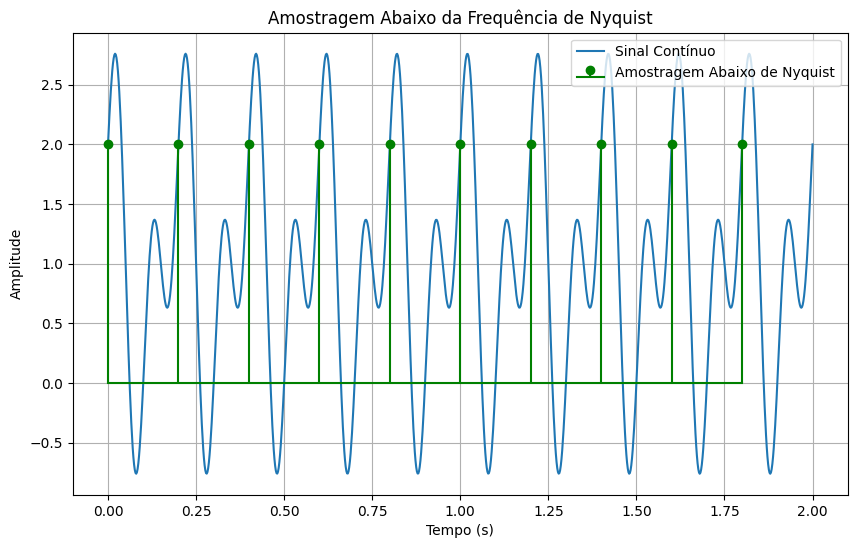

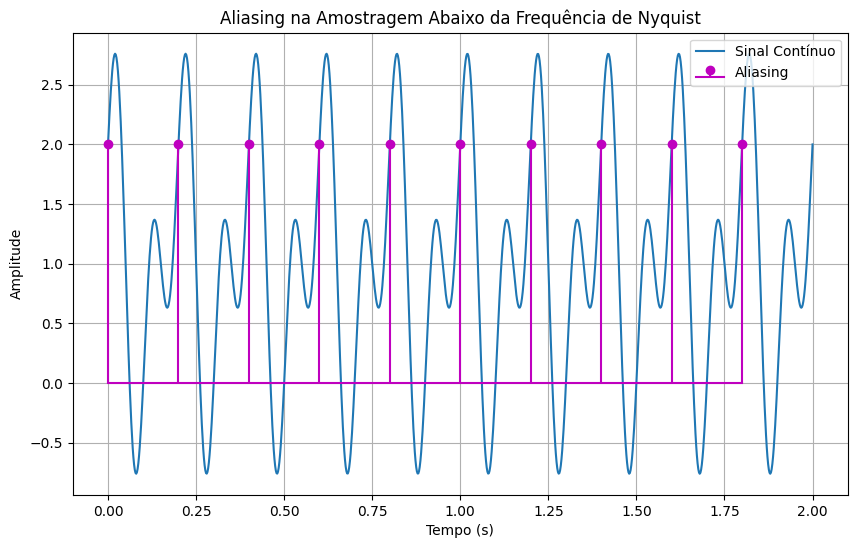

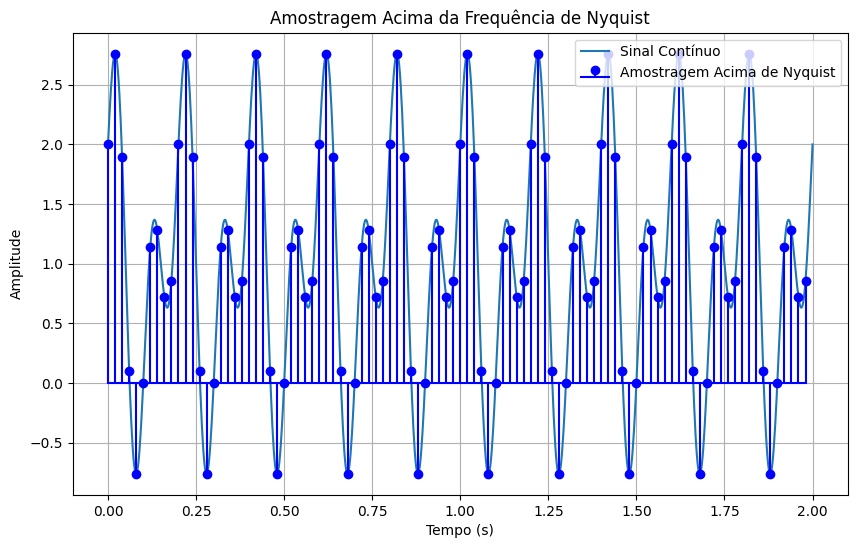

In [17]:
# Plotando o sinal contínuo e a amostragem na frequência de Nyquist
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_nyquist, y_nyquist, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.title('Amostragem na Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o sinal contínuo e a amostragem abaixo da frequência de Nyquist
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_below_nyquist, y_below_nyquist, linefmt='g-', markerfmt='go', basefmt='g-', label='Amostragem Abaixo de Nyquist')
plt.title('Amostragem Abaixo da Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o sinal de aliasing gerado pela amostragem abaixo de Nyquist
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_below_nyquist, y_aliasing, linefmt='m-', markerfmt='mo', basefmt='m-', label='Aliasing')
plt.title('Aliasing na Amostragem Abaixo da Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o sinal contínuo e a amostragem acima da frequência de Nyquist
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_above_nyquist, y_above_nyquist, linefmt='b-', markerfmt='bo', basefmt='b-', label='Amostragem Acima de Nyquist')
plt.title('Amostragem Acima da Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
